In [125]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [126]:
df=pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [127]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['RestingECG'] = le.fit_transform(df['RestingECG'])
df['ChestPainType'] = le.fit_transform(df['ChestPainType'])
df['Sex'] = le.fit_transform(df['Sex'])

In [128]:
# le.fit(df1['RestingECG'])
# le.fit(df1['RestingBP'])
df['RestingECG'].unique()

array([1, 2, 0])

In [ ]:
df['']

In [129]:
df['ExerciseAngina'] = df['ExerciseAngina'].replace(['Y', 'N'], ['1', '0'])

In [130]:
df['ST_Slope'] = df['ST_Slope'].replace(['Up', 'Flat','Down'], ['1', '0','2'])

In [162]:
df['HeartDisease'].count()

918

(array([410.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 508.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

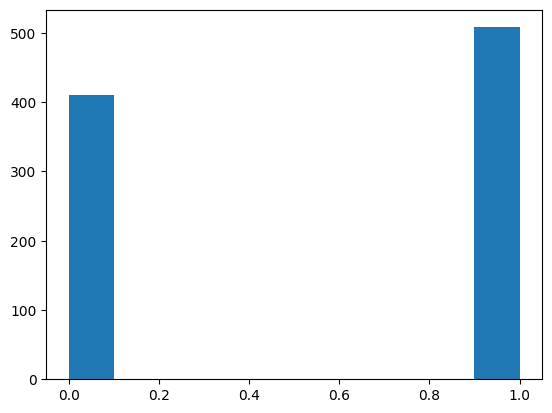

In [163]:
plt.hist(df['HeartDisease'])

In [132]:
dataset=df.values

In [133]:
x=dataset[:,0:11]
y=dataset[:,11]

In [134]:
x

array([[40, 1, 1, ..., '0', 0.0, '1'],
       [49, 0, 2, ..., '0', 1.0, '0'],
       [37, 1, 1, ..., '0', 0.0, '1'],
       ...,
       [57, 1, 0, ..., '1', 1.2, '0'],
       [57, 0, 1, ..., '0', 0.0, '0'],
       [38, 1, 2, ..., '0', 0.0, '1']], dtype=object)

In [135]:
df['HeartDisease'].dtype

dtype('int64')

In [136]:
y=y.astype('int64')

In [137]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [138]:
min_max_scaler=preprocessing.MinMaxScaler()
x_scale=min_max_scaler.fit_transform(x)

In [139]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scale, y, test_size=0.05)
# X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [140]:
from keras.models import Sequential
from keras.layers import Dense

In [154]:
model=Sequential([
    Dense(126,activation='relu',input_shape=(11,)),
    Dense(20,activation='relu'),
    # Dense(16,activation='relu'),
    Dense(1,activation='sigmoid'),
])

In [155]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [157]:
hist = model.fit(X_train, Y_train,
          batch_size=20, epochs=35
                 ,validation_data=(X_test, Y_test))

Epoch 1/35
44/44 [==============================] - 0s 3ms/step - loss: 0.2257 - accuracy: 0.9094 - val_loss: 0.3736 - val_accuracy: 0.8478
Epoch 2/35
44/44 [==============================] - 0s 3ms/step - loss: 0.2246 - accuracy: 0.9140 - val_loss: 0.3406 - val_accuracy: 0.8478
Epoch 3/35
44/44 [==============================] - 0s 3ms/step - loss: 0.2220 - accuracy: 0.9014 - val_loss: 0.3749 - val_accuracy: 0.8478
Epoch 4/35
44/44 [==============================] - 0s 3ms/step - loss: 0.2177 - accuracy: 0.9151 - val_loss: 0.3403 - val_accuracy: 0.8696
Epoch 5/35
44/44 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9151 - val_loss: 0.3581 - val_accuracy: 0.8696
Epoch 6/35
44/44 [==============================] - 0s 3ms/step - loss: 0.2213 - accuracy: 0.9037 - val_loss: 0.3670 - val_accuracy: 0.8478
Epoch 7/35
44/44 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9071 - val_loss: 0.3738 - val_accuracy: 0.8478
Epoch 8/35
44/44 [==

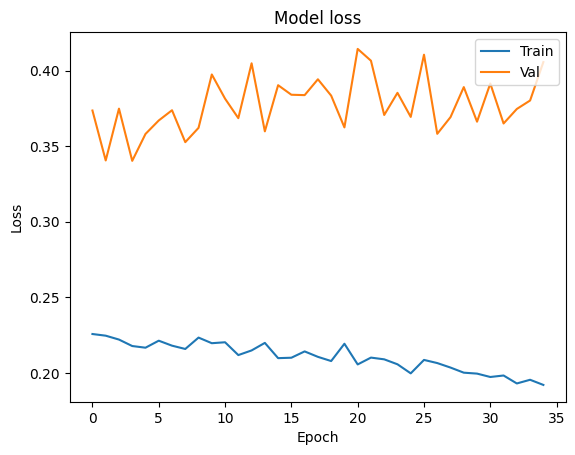

In [158]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

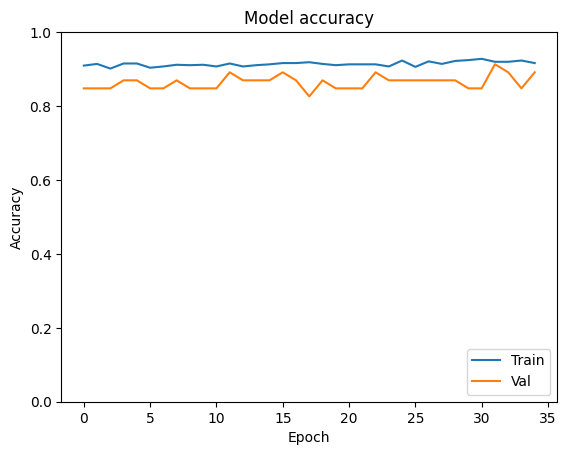

In [160]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.ylim(0,1)
plt.show()